In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
for col in df.select_dtypes(include=['object', 'category']):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Ajyal\AppData\Local\Temp\ipykernel_9048\1146202980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for column in object_columns:
    le = LabelEncoder() # Instantiate LabelEncoder
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


C:\Users\Ajyal\AppData\Local\Temp\ipykernel_9048\1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

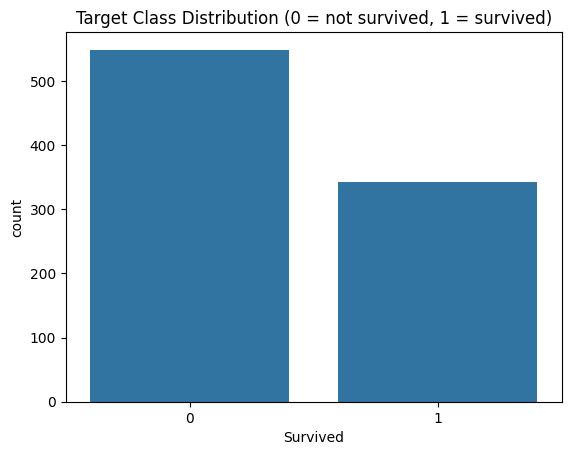

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Target Class Distribution (0 = not survived, 1 = survived)")
plt.show()

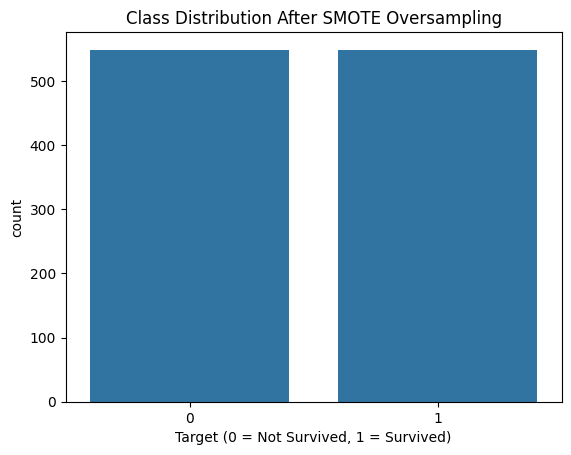

Original shape: (891, 11) (891,)
Resampled shape: (1098, 11) (1098,)


In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)


sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE Oversampling")
plt.xlabel("Target (0 = Not Survived, 1 = Survived)")
plt.show()


print("Original shape:", X.shape, y.shape)
print("Resampled shape:", X_resampled.shape, y_resampled.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

[[ 92  11]
 [ 12 105]]
              precision    recall  f1-score   support

Not Survived       0.88      0.89      0.89       103
    Survived       0.91      0.90      0.90       117

    accuracy                           0.90       220
   macro avg       0.89      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

